In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!apt-get -qq install fonts-nanum
import matplotlib.font_manager as fm
import matplotlib as mpl

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(fontpath)
mpl.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
#from sklearn.model_selection import train_test_split

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data_2024_3.csv', encoding='euc-kr')

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

print(data.head())


# Define split ratios
#train_ratio = 0.7
#validation_ratio = 0.15
#test_ratio = 0.15

# Split the data into training, validation, and testing sets
#train_data, temp_data = train_test_split(data, test_size=(1 - train_ratio))
#val_data, test_data = train_test_split(temp_data, test_size=test_ratio/(test_ratio + validation_ratio))

# Save the splits to CSV files if needed
#train_data.to_csv("train_data.csv", index=False)
#val_data.to_csv("val_data.csv", index=False)
#test_data.to_csv("test_data.csv", index=False)

     관측지점              관측시간  관측온도  관측습도    관측기압  관측풍속   관측풍향  관측최대풍속  관측미세먼지  \
0   나주_산림  2024-03-21 22:40   4.5  60.0  1005.1   0.0    6.0     NaN    26.1   
1   구미_산림  2024-03-20 16:10   8.3  18.1   986.4   1.7   23.4     4.8    24.7   
2  인천_주거1  2024-03-23 09:40   8.9  88.8  1000.0   0.8  244.2     2.0    56.7   
3   고매_도로  2024-03-19 21:50   5.3  59.3  1011.7   1.6  306.4     5.8    66.3   
4   인천_산단  2024-03-06 09:10   4.9  63.5  1014.0   0.3    4.1     NaN    19.0   

   관측초미세먼지  ...  (AVOC)배관관측온도  (BVOC)관측온도  (BVOC)관측습도  (BVOC)관측기압  (BVOC)관측풍속  \
0     21.8  ...         102.8         4.5        60.2      1005.1         0.2   
1     14.9  ...         105.6         8.3        18.0       986.4         1.8   
2     47.0  ...         103.5         9.0        88.7      1000.0         0.7   
3     55.4  ...         104.0         5.4        59.5      1011.8         1.6   
4     12.4  ...         103.6         5.0        63.2      1014.1         0.4   

   (BVOC)관측풍향  (BVOC)관측최대풍속  (BV

In [4]:
data.dropna(subset=["관측시간", "관측지점"], inplace=True)

# 관측시간을 datetime 타입으로 변환
data["관측시간"] = pd.to_datetime(data["관측시간"])

data[["관측지점", "관측지점세부"]] = data["관측지점"].str.split('_', expand=True)

columns_to_fill = ["관측최대풍속"]
columns_to_fill = ["관측최대풍속", "(AVOC)관측최대풍속", "(BVOC)관측최대풍속"]

for column in columns_to_fill:
    data[column] = data.groupby(["관측시간", "관측지점"])[column].transform(
        lambda x: x.fillna(x.mean())
    )

    # 그래도 남아있는 결측치는 관측지점으로 채우기
    data[column] = data.groupby('관측지점')[column].transform(
        lambda x: x.fillna(x.mean())
    )

    # 그래도 남아있는 결측치는 관측시간으로 채우기
    data[column] = data.groupby('관측시간')[column].transform(
        lambda x: x.fillna(x.mean())
    )

    # 여전히 남아있는 결측치는 전체 평균으로 채우기
    overall_mean = data[column].mean()
    data[column].fillna(overall_mean, inplace=True)

    # 결측치 처리 전 결측치 확인
if data.isnull().values.any():
    print("데이터프레임에 결측치가 있습니다.")
else:
    print("데이터프레임에 결측치가 없습니다.")

# 각 열의 결측치 수 확인
missing_values = data.isnull().sum()
print("각 열의 결측치 수:")
print(missing_values)

data.sort_values(by="관측시간", inplace=True)
data = data.drop(columns=['관측지점', '관측지점세부'])
data = data.drop(columns=['(AVOC)관측온도', '(AVOC)관측습도', '(AVOC)관측기압', '(AVOC)관측풍속', '(AVOC)관측풍향', '(AVOC)관측최대풍속', '(AVOC)관측미세먼지', '(AVOC)관측초미세먼지', '(AVOC)관측극초미세먼지', '(AVOC)배관관측온도', '(BVOC)관측온도', '(BVOC)관측습도', '(BVOC)관측기압', '(BVOC)관측풍속', '(BVOC)관측풍향', '(BVOC)관측최대풍속', '(BVOC)관측미세먼지', '(BVOC)관측초미세먼지', '(BVOC)관측극초미세먼지' ])

데이터프레임에 결측치가 있습니다.
각 열의 결측치 수:
관측지점               0
관측시간               0
관측온도               8
관측습도               8
관측기압               8
관측풍속              14
관측풍향              14
관측최대풍속             0
관측미세먼지             0
관측초미세먼지            0
관측극초미세먼지           0
배관관측온도             0
(AVOC)관측온도         8
(AVOC)관측습도         8
(AVOC)관측기압         8
(AVOC)관측풍속        12
(AVOC)관측풍향        12
(AVOC)관측최대풍속       0
(AVOC)관측미세먼지       0
(AVOC)관측초미세먼지      0
(AVOC)관측극초미세먼지     0
(AVOC)배관관측온도       0
(BVOC)관측온도         8
(BVOC)관측습도         8
(BVOC)관측기압         8
(BVOC)관측풍속        10
(BVOC)관측풍향        10
(BVOC)관측최대풍속       0
(BVOC)관측미세먼지       0
(BVOC)관측초미세먼지      0
(BVOC)관측극초미세먼지     0
관측지점세부             0
dtype: int64


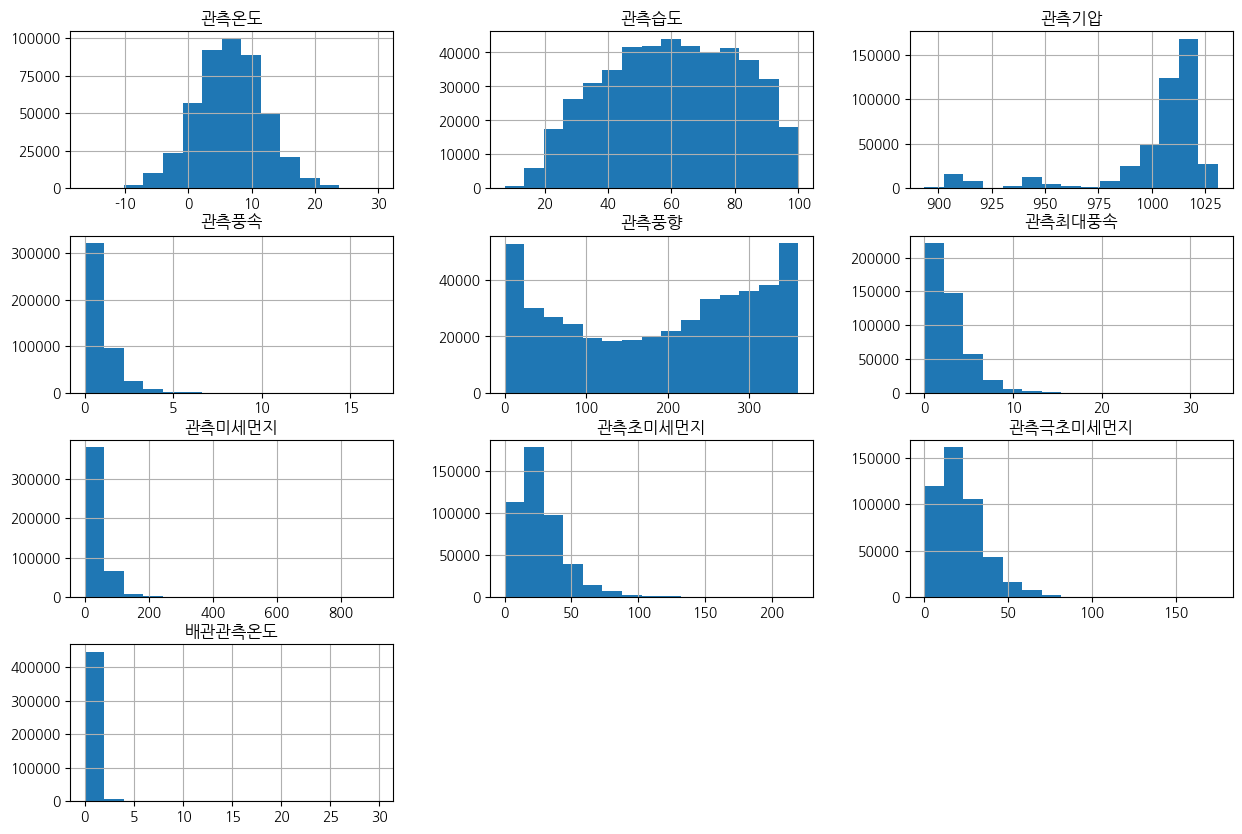

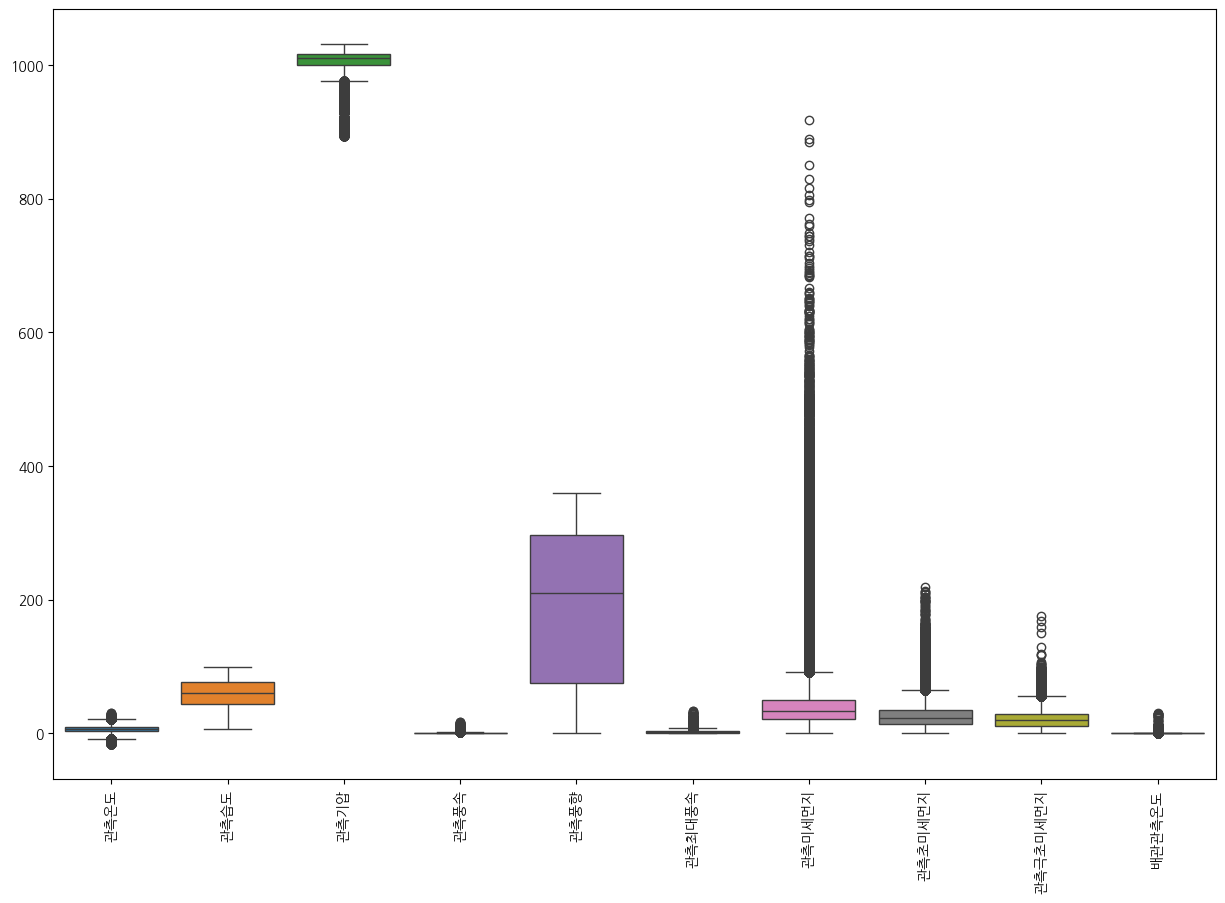

In [5]:
columns_to_visualize = [col for col in data.columns if col != '관측시간']
data[columns_to_visualize].hist(bins=15, figsize=(15, 10))
plt.show()

# Plot boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

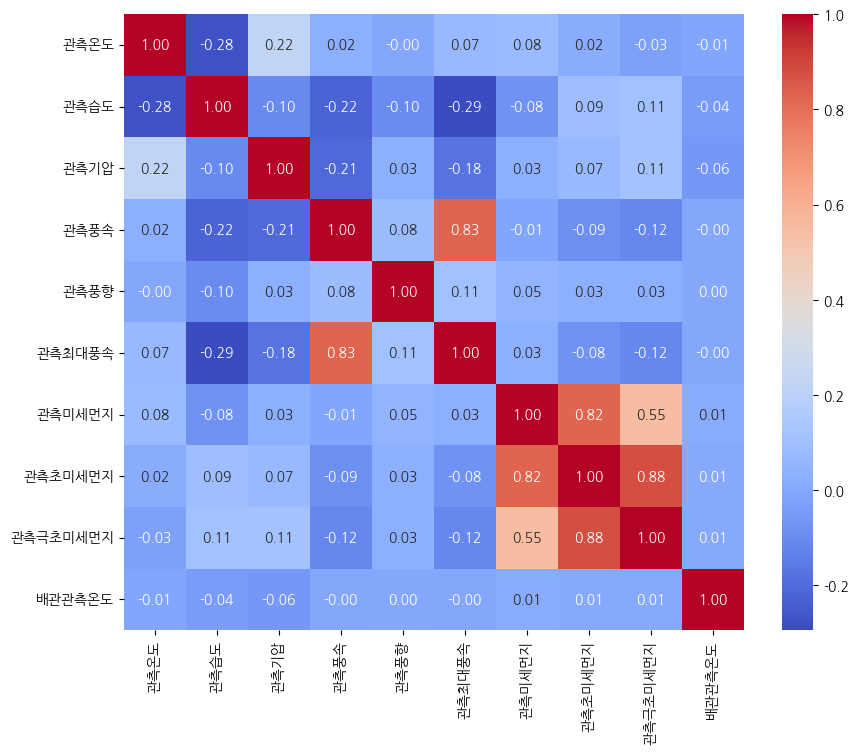

In [6]:
# Compute the correlation matrix
corr = data[columns_to_visualize].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

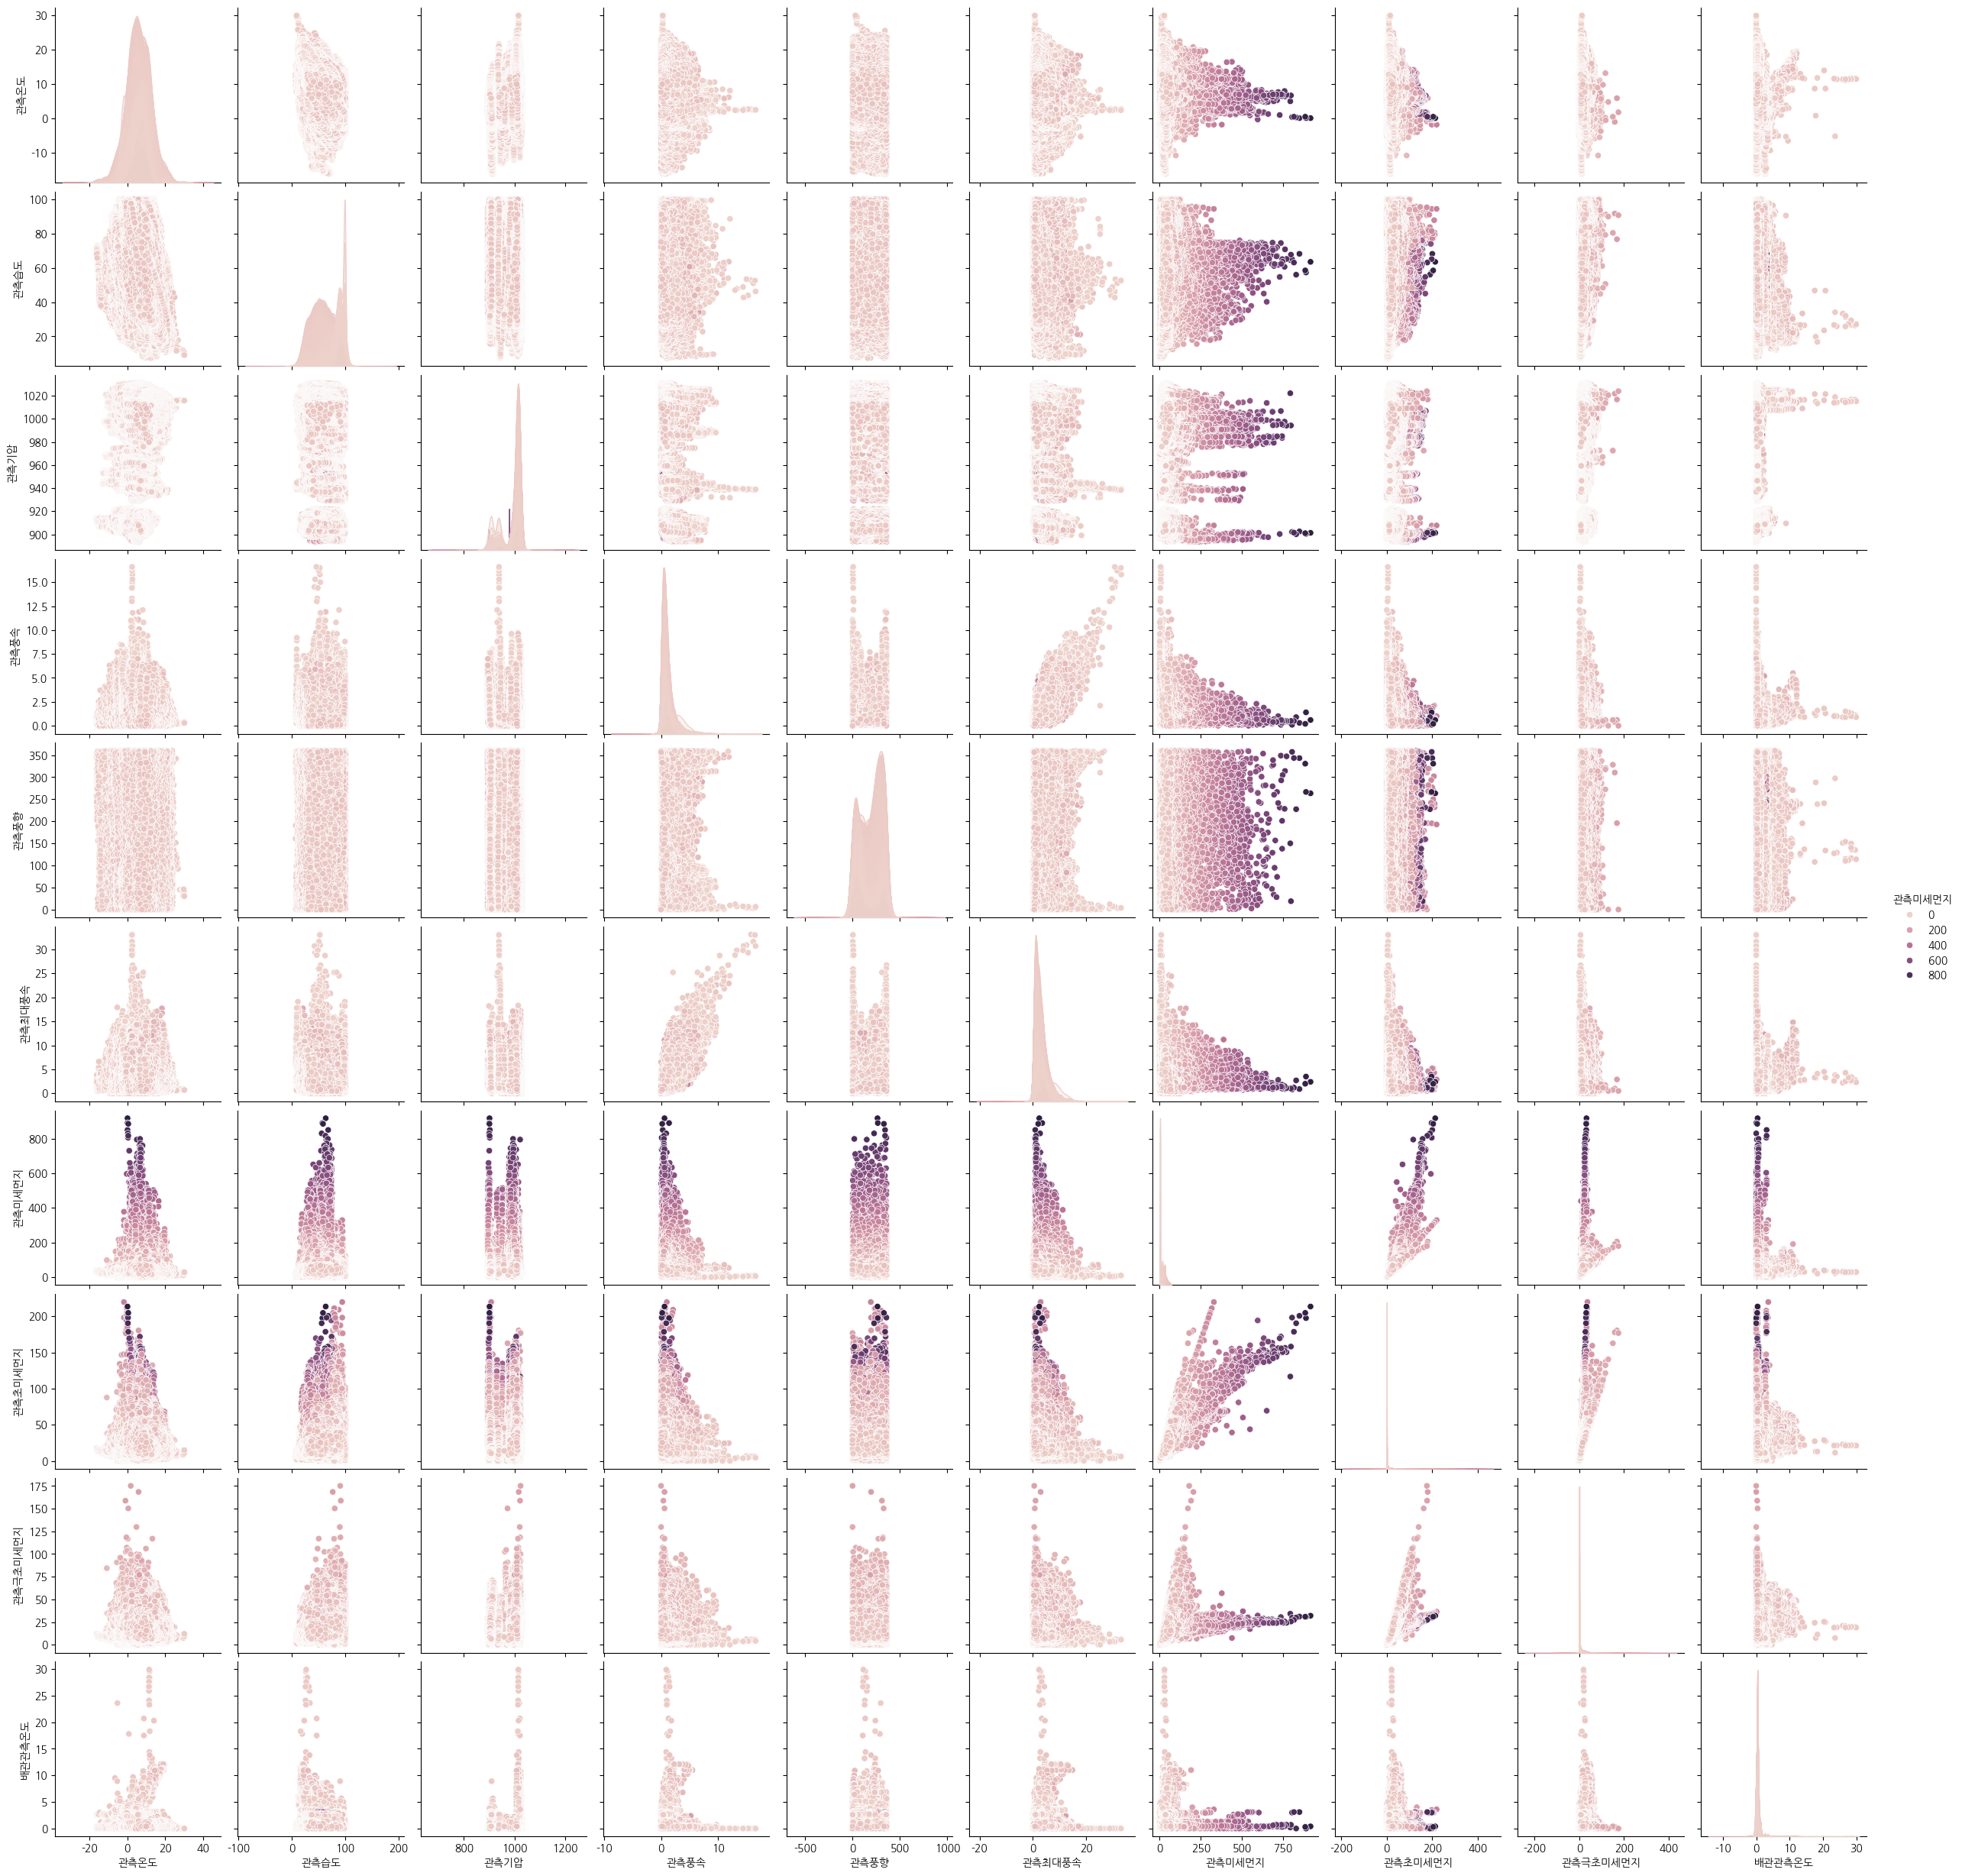

In [7]:
sns.pairplot(data, vars=columns_to_visualize, hue='관측미세먼지')
plt.show()

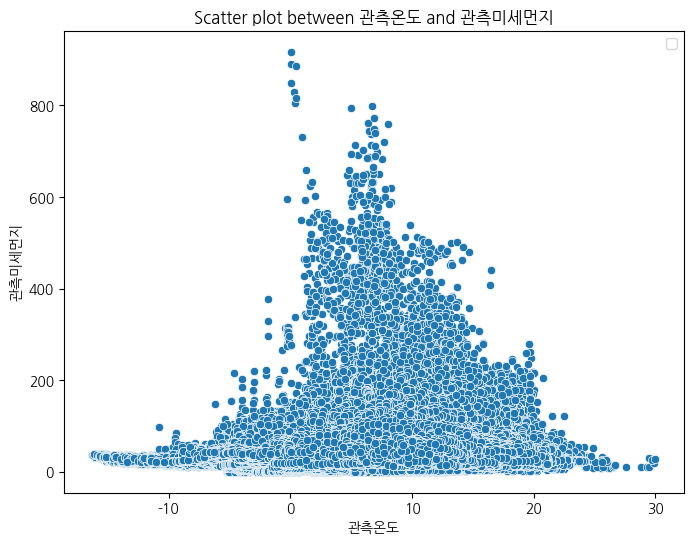

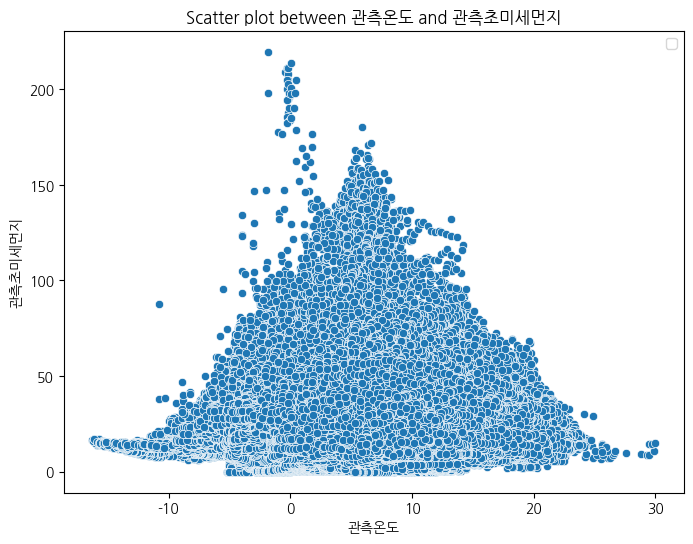

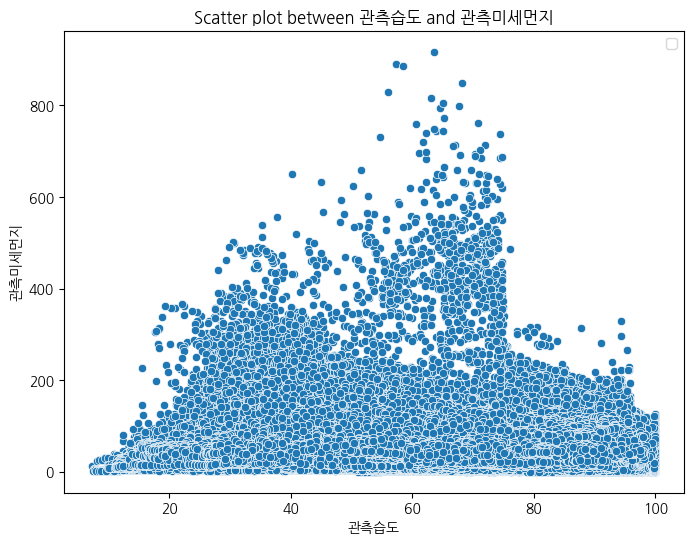

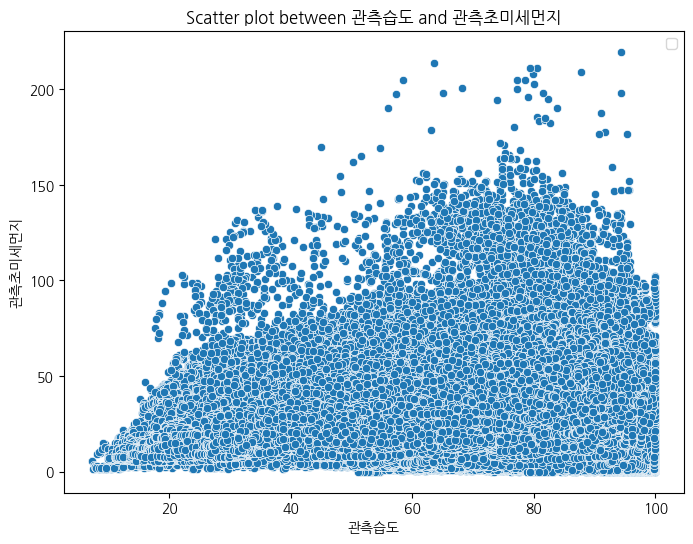

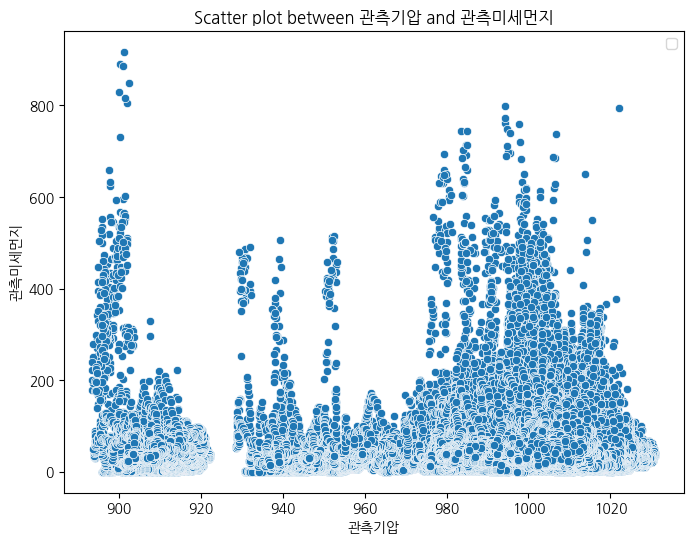

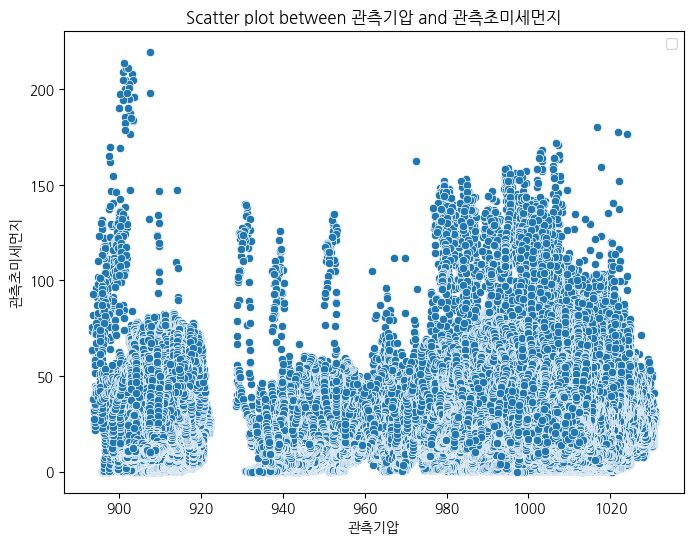

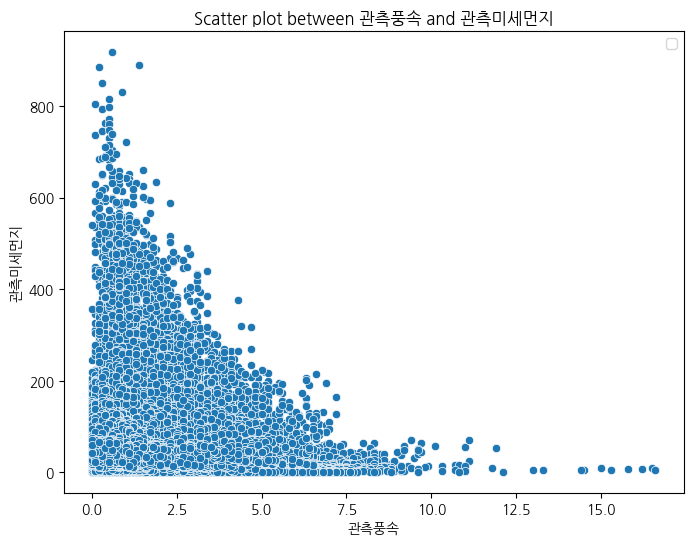

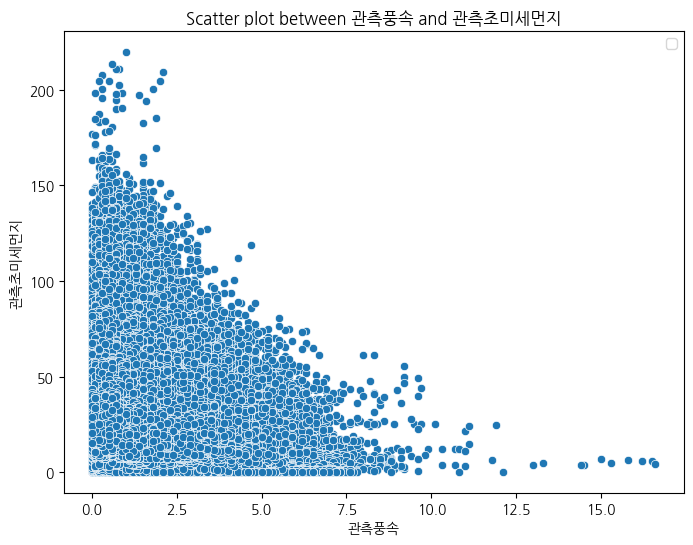

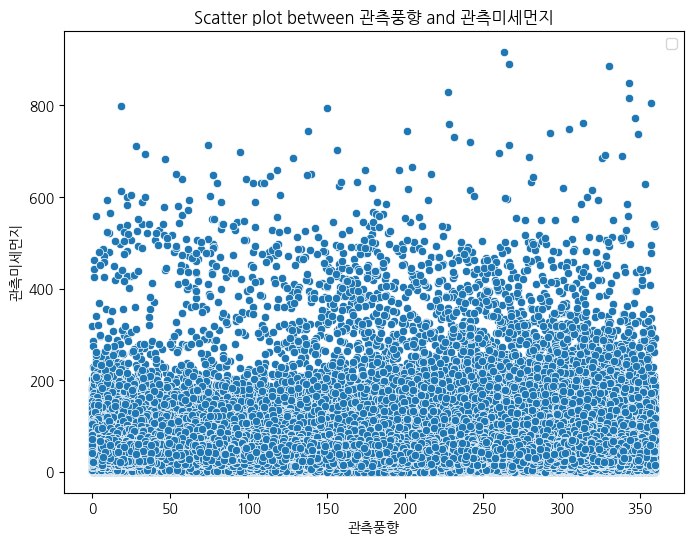

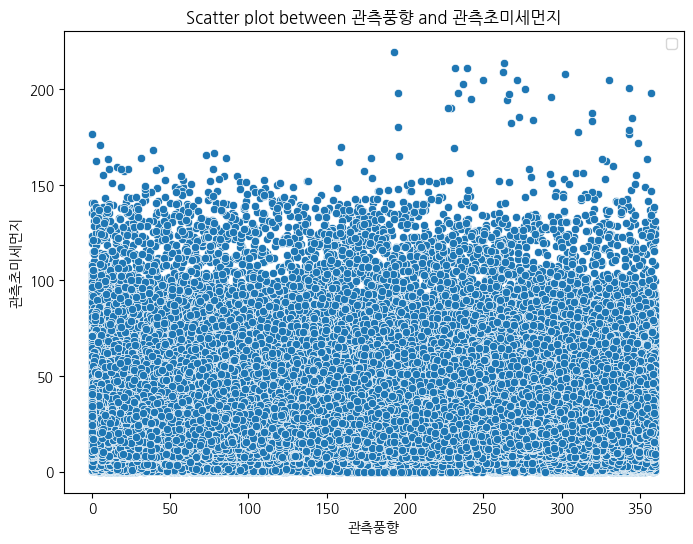

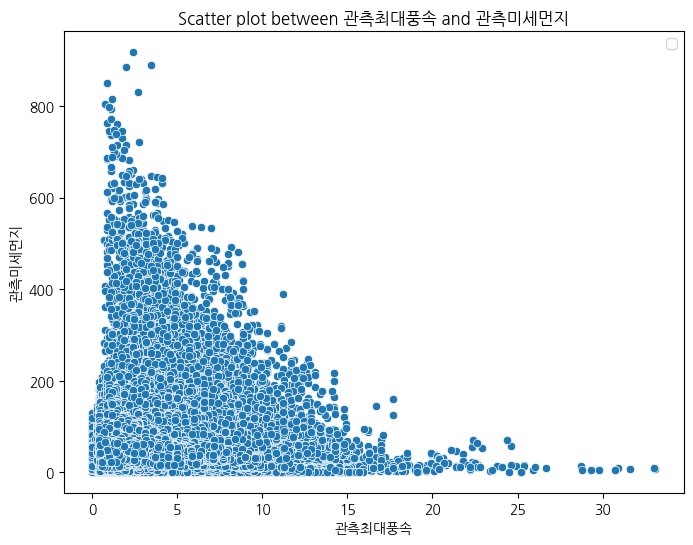

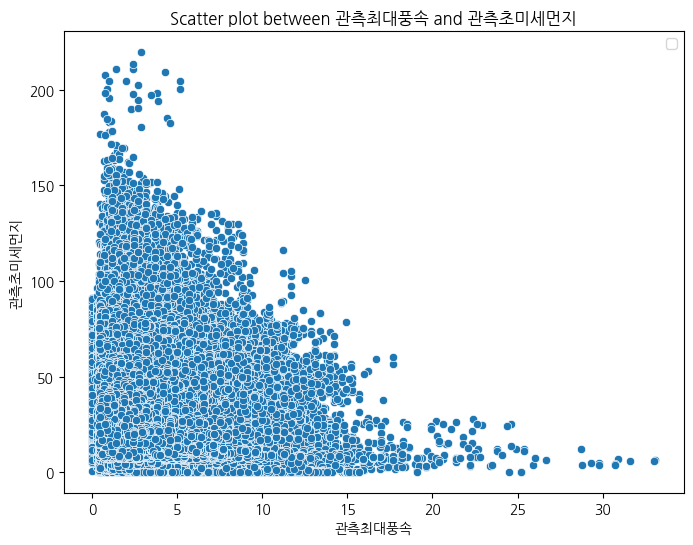

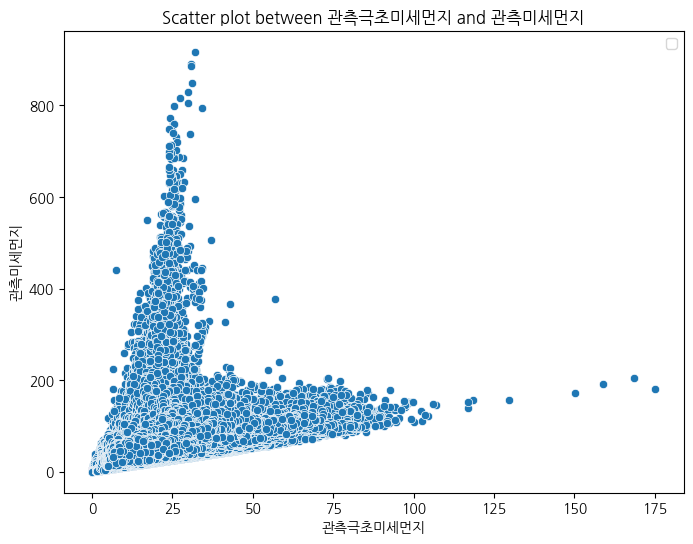

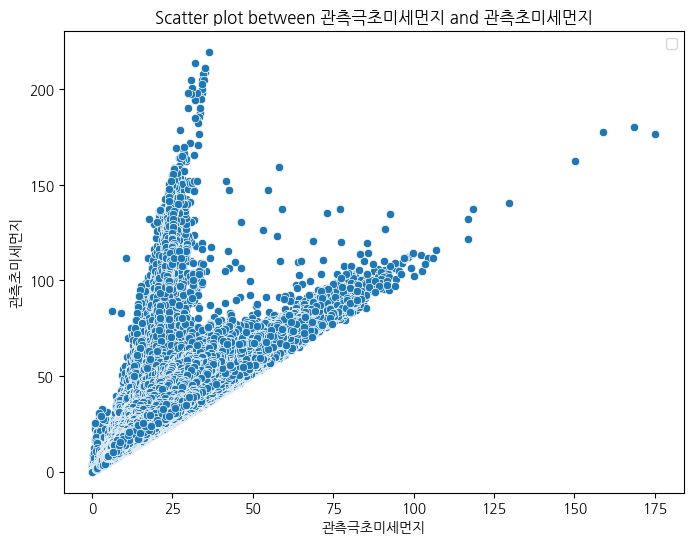

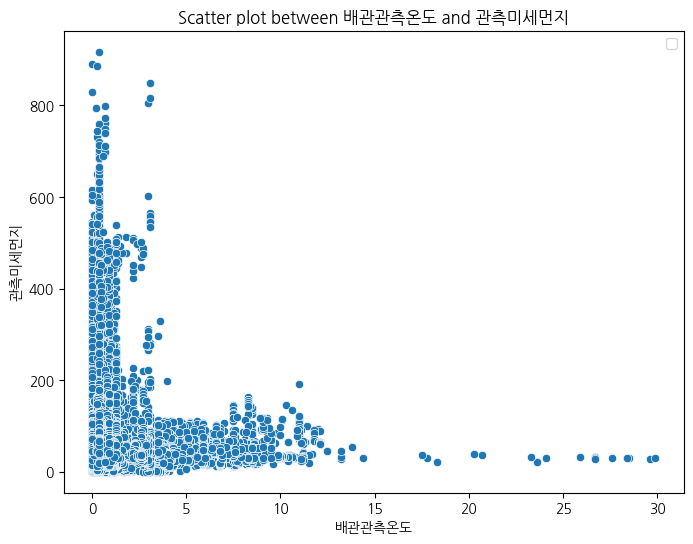

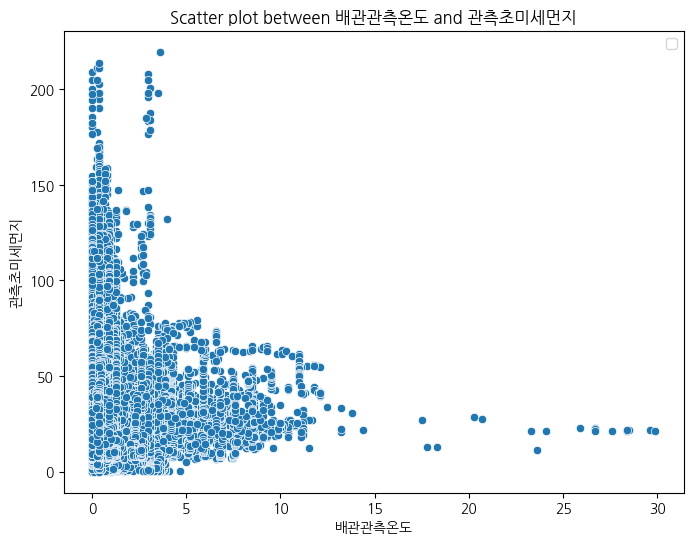

In [8]:
features = [col for col in columns_to_visualize if col not in ['관측미세먼지', '관측초미세먼지']]
target_vars = ['관측미세먼지', '관측초미세먼지']

for feature in features:
    for target in target_vars:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[feature], y=data[target])
        plt.title(f'Scatter plot between {feature} and {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.legend()
        plt.show()